 # <h1 style='background:#6daa9f; border:0; color:black'><center>HEART FAILURE</center></h1> 

Cardiovascular diseases are the most common cause of deaths globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Heart failure is a common event caused by Cardiovascular diseases. It is characterized by the heart’s inability to pump an adequate supply of blood to the body. Without sufficient blood flow, all major body functions are disrupted. Heart failure is a condition or a collection of symptoms that weaken the heart. 


 # **<span style="color:#6daa9f;">TABLE OF CONTENTS</span>**
 

**IMPORTING LIBRARIES**

**LOADING DATA**

**DATA ANALYSIS**

**DATA PREPROCESSING**

**MODEL BUILDING**

**CONCLUSIONS**

# **<span style="color:#6daa9f;">IMPORTING LIBRARIES</span>**


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras.utils import to_categorical
from keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

# **<span style="color:#6daa9f;">LOADING DATA</span>**

In [3]:
#loading data
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


**About the data:**

* age: Age of the patient
* anaemia: If the patient had the haemoglobin below the normal range
* creatinine_phosphokinase: The level of the creatine phosphokinase in the blood in mcg/L
* diabetes: If the patient was diabetic
* ejection_fraction: Ejection fraction is a measurement of how much blood the left ventricle pumps out with each contraction
* high_blood_pressure: If the patient had hypertension
* platelets: Platelet count of blood in kiloplatelets/mL
* serum_creatinine: The level of serum creatinine in the blood in mg/dL
* serum_sodium: The level of serum sodium in the blood in mEq/L
* sex: The sex of the patient
* smoking: If the patient smokes actively or ever did in past
* time: It is the time of the patient's follow-up visit for the disease in months
* DEATH_EVENT: If the patient deceased during the follow-up period


# **<span style="color:#6daa9f;">DATA ANALYSIS</span>**

Steps in data analysis and visulisation:

We begin our analysis by plotting a count plot of the targer attribute. 
A corelation matrix od the various attributes to examine the feature importance.



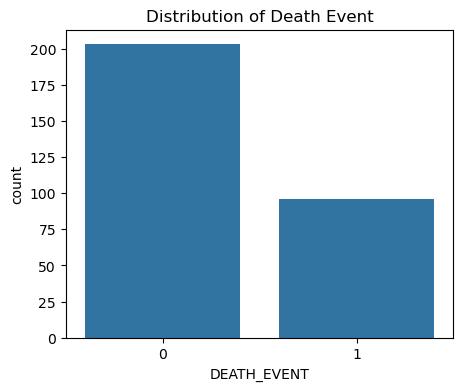

In [5]:
plt.figure(figsize=(5,4))
plt.title('Distribution of Death Event')
sns.countplot(x= data["DEATH_EVENT"])
plt.show()

Point to note is that there is an imbalance in the data.

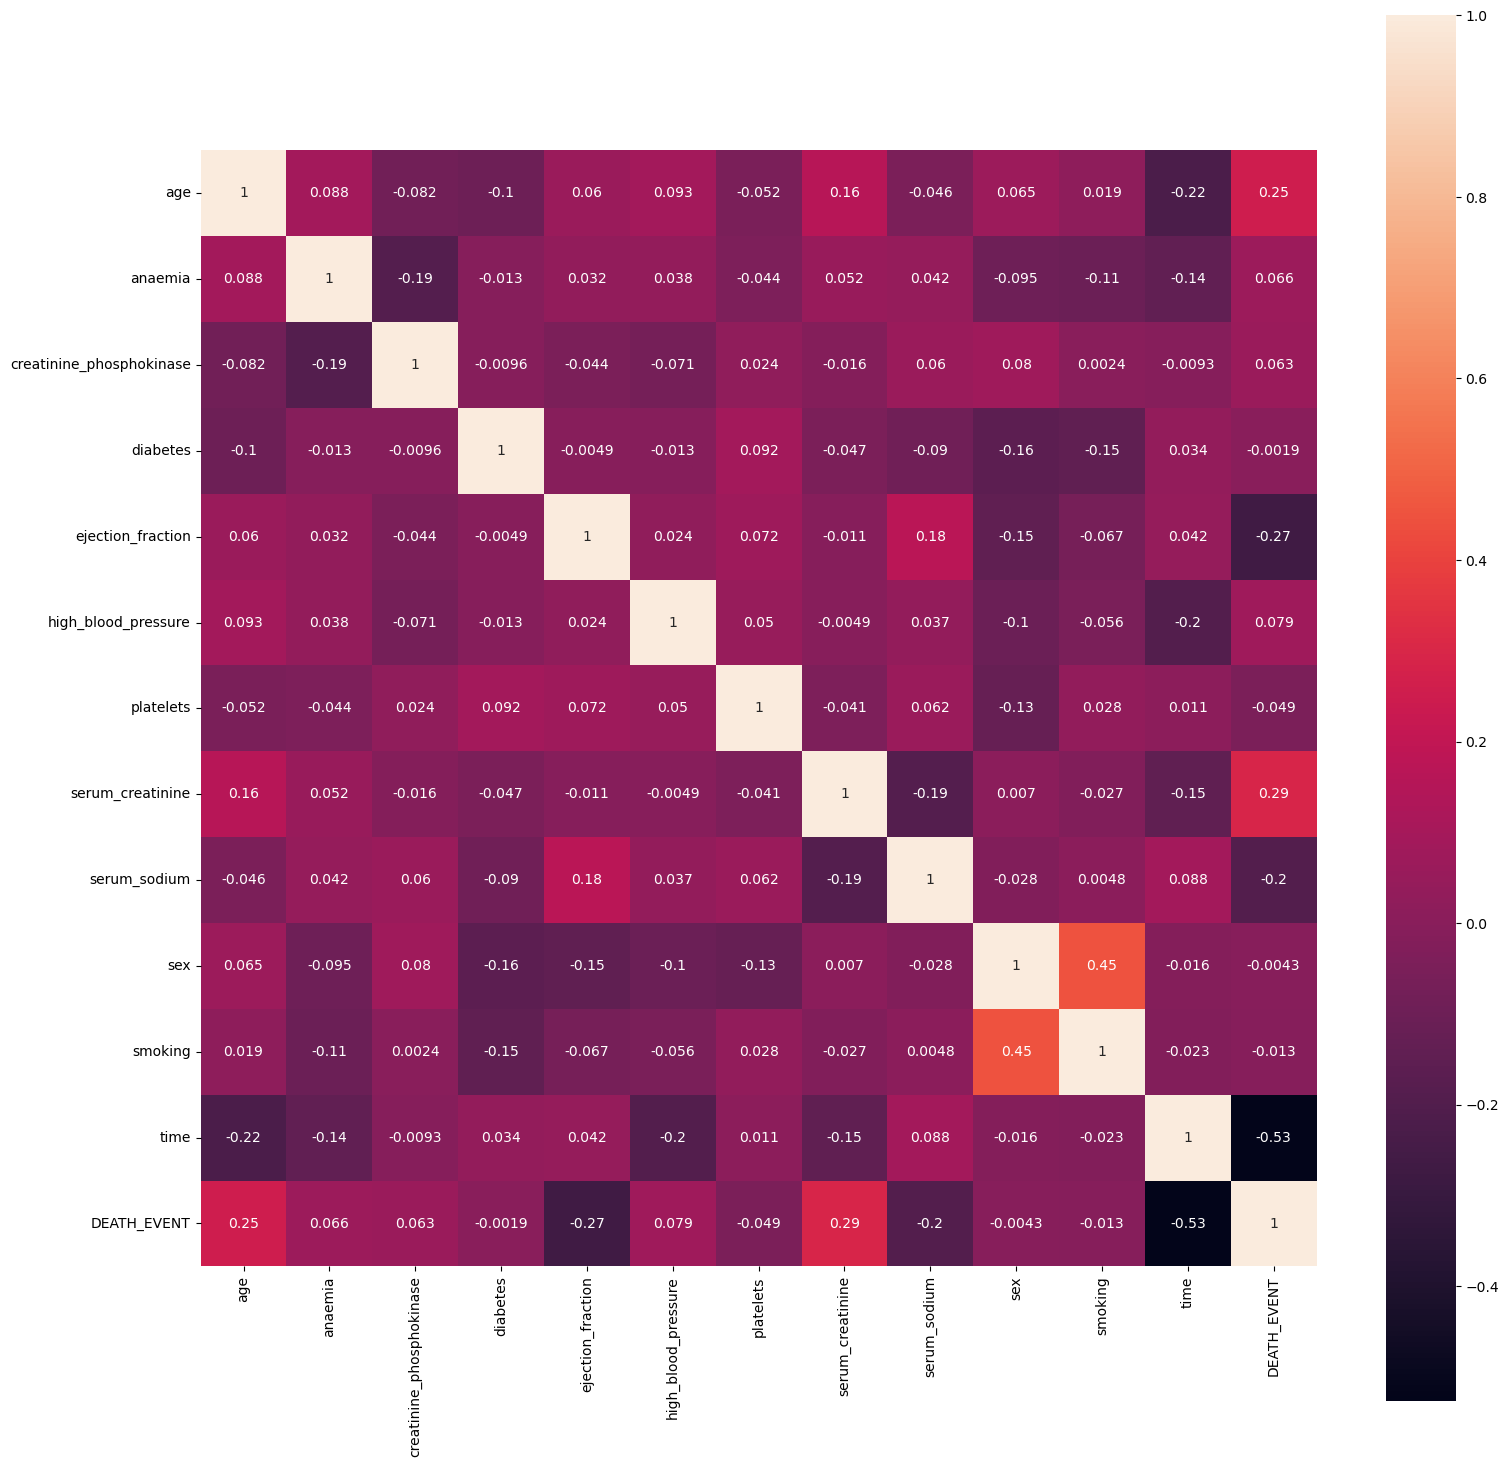

In [6]:
corrmat = data.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,annot=True, square=True);

**Notable points:**
* Time of the patient's follow-up visit for the disease is crucial in as initial diagnosis with cardiovascular issue and treatment reduces the chances of any fatality. It holds and inverse relation. 
* Ejection fraction is the second most important feature. It is quite expected as it is basically the efficiency of the heart.
* Age of the patient is the third most correlated feature. Clearly as heart's functioning declines with ageing 

**Next, we will examine the count plot of age.**

In [7]:
data['age']=data['age'].astype('int64')

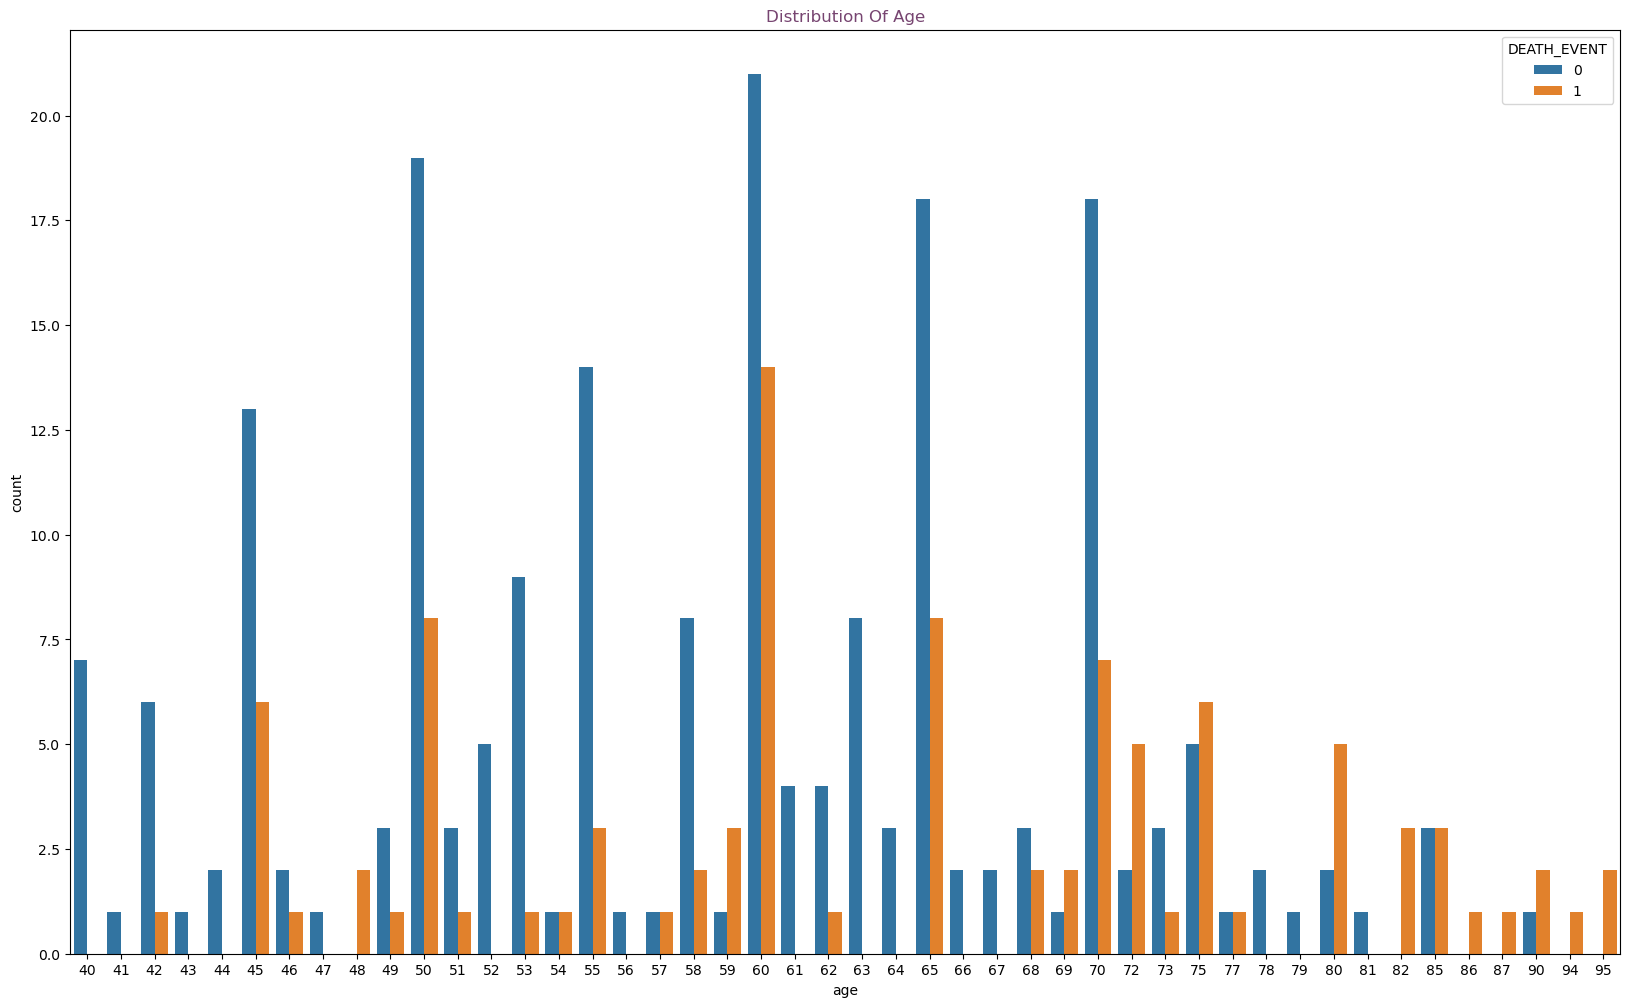

In [8]:
#Evauating age distrivution 
plt.figure(figsize=(20,12))
Days_of_week=sns.countplot(x=data['age'],data=data, hue ="DEATH_EVENT")
Days_of_week.set_title("Distribution Of Age", color="#774571");

In [9]:
# # Boxen and swarm plot of some non binary features.
# feature = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium", "time"]
# for i in feature:
#     plt.figure(figsize=(8,8))
#     sns.swarmplot(x=data["DEATH_EVENT"], y=data[i], color="black", alpha=0.5)
#     sns.boxenplot(x=data["DEATH_EVENT"], y=data[i])
#     plt.show()

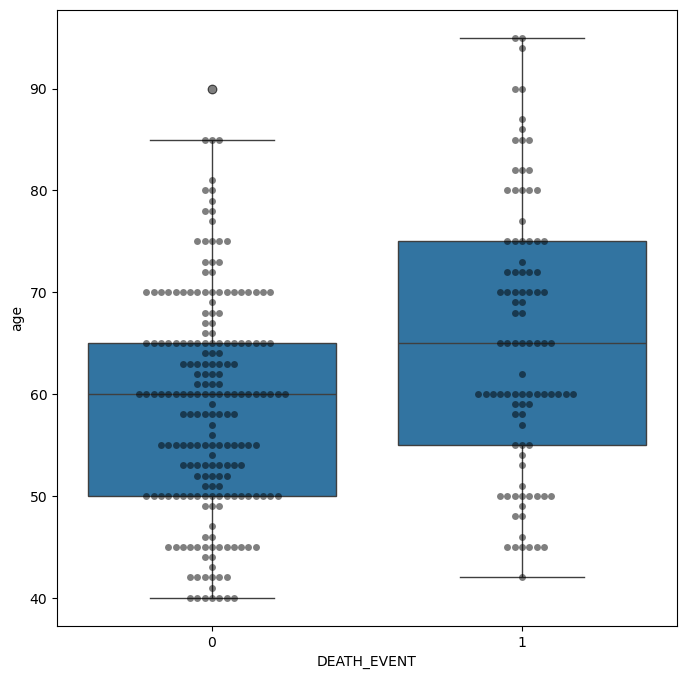

c:\Users\user\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


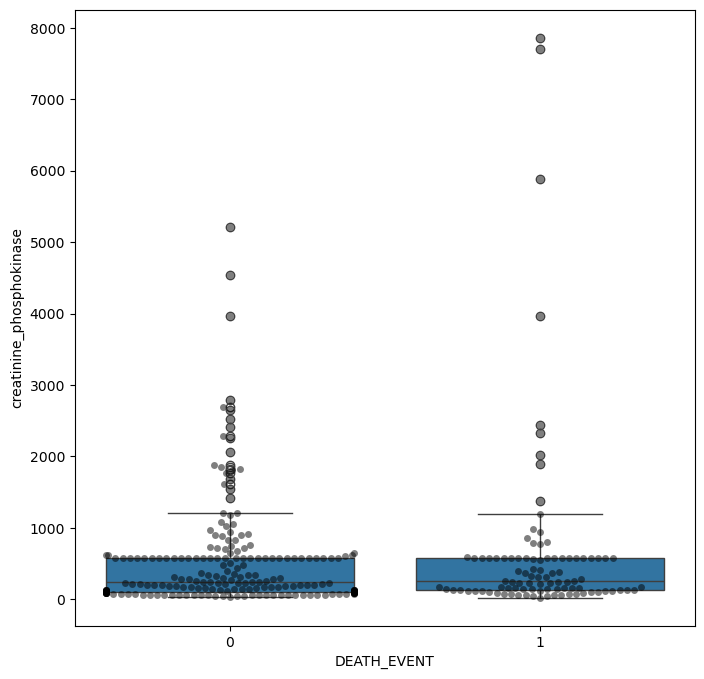

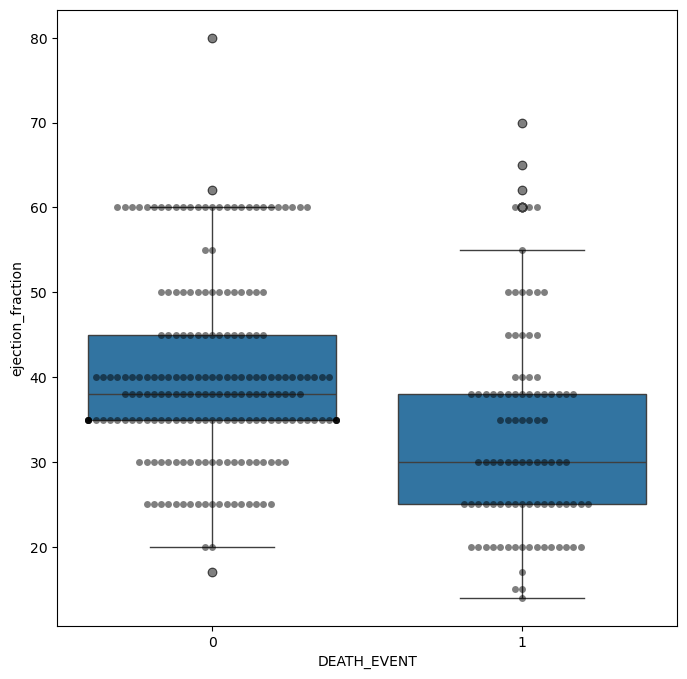

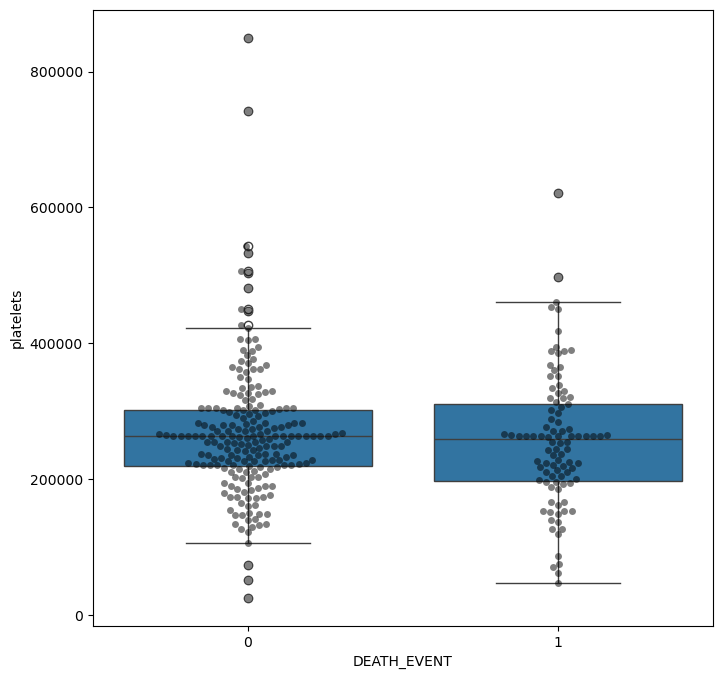

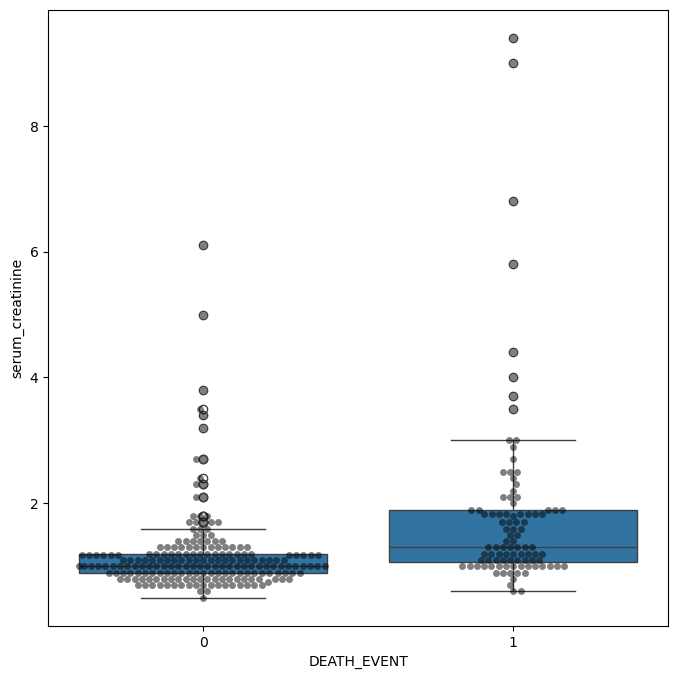

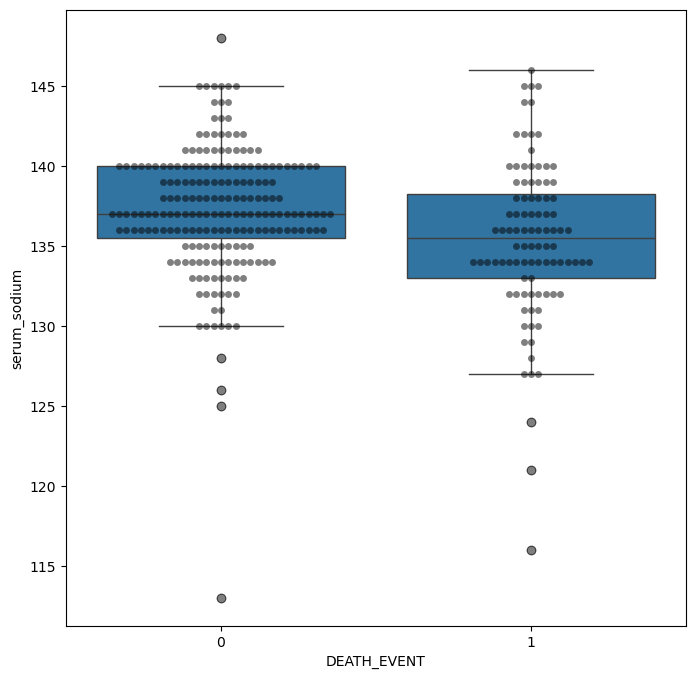

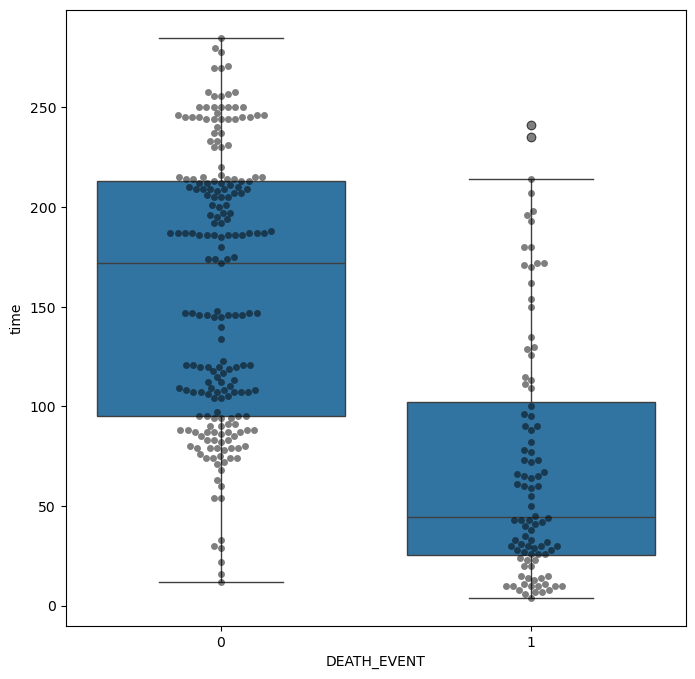

In [10]:
# Boxen and swarm plot of some non binary features.
feature = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium", "time"]
for i in feature:
    plt.figure(figsize=(8,8))
    sns.swarmplot(x=data["DEATH_EVENT"], y=data[i], color="black", alpha=0.5)
    sns.boxplot(x=data["DEATH_EVENT"], y=data[i])
    plt.show()

I spotted outliers on our dataset. I didn't remove them yet as it may lead to overfitting. Though we may end up with better statistics. In this case, with medical data, the outliers may be an important deciding factor.

Next, we examine the kdeplot of time and age as they both are significant features.

In [12]:
data.duplicated().sum()

0

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.829431,11.894997,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


# **<span style="color:#6daa9f;">DATA PREPROCESSING</span>**

**Steps involved in Data Preprocessing** 
* Dropping the outliers based on data analysis
* Assigning values to features as X and target as y
* Perform the scaling of the features
* Split test and training sets

In [14]:
#assigning values to features as X and target as y
X=data.drop(["DEATH_EVENT"],axis=1)
y=data["DEATH_EVENT"]

In [16]:
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [17]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  train_test_split

In [19]:
#spliting test and training sets
X_train, X_test, y_train,y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42,shuffle = True)

In [20]:
scaler=StandardScaler()
X_train_sc=pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test_sc=pd.DataFrame(scaler.transform(X_test),columns=X_train.columns)

In [21]:
X_train_sc.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,1.166633,-0.761898,-0.526972,-0.731809,0.116137,-0.668153,-0.391810,0.929476,-0.538588,0.872278,-0.563093,0.553366
1,-1.059976,1.312513,-0.513676,-0.731809,-1.392346,-0.668153,-0.534354,0.374297,0.156641,0.872278,-0.563093,-1.450977
2,0.721311,1.312513,-0.499358,-0.731809,-0.973323,1.496663,-0.260011,-0.489458,0.851871,-1.146423,-0.563093,-1.346175
3,-0.169332,1.312513,0.479371,1.366476,0.702769,-0.668153,-0.127920,4.405153,-1.233818,0.872278,-0.563093,-0.140949
4,0.275990,1.312513,-0.511631,1.366476,1.959837,1.496663,-0.605480,-0.585431,0.851871,-1.146423,-0.563093,-0.311253


C:\Users\user\AppData\Local\Temp\ipykernel_13896\1025767989.py:4: UserWarning: 
The palette list has fewer values (5) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.boxenplot(data = X_train_sc,palette = colours)


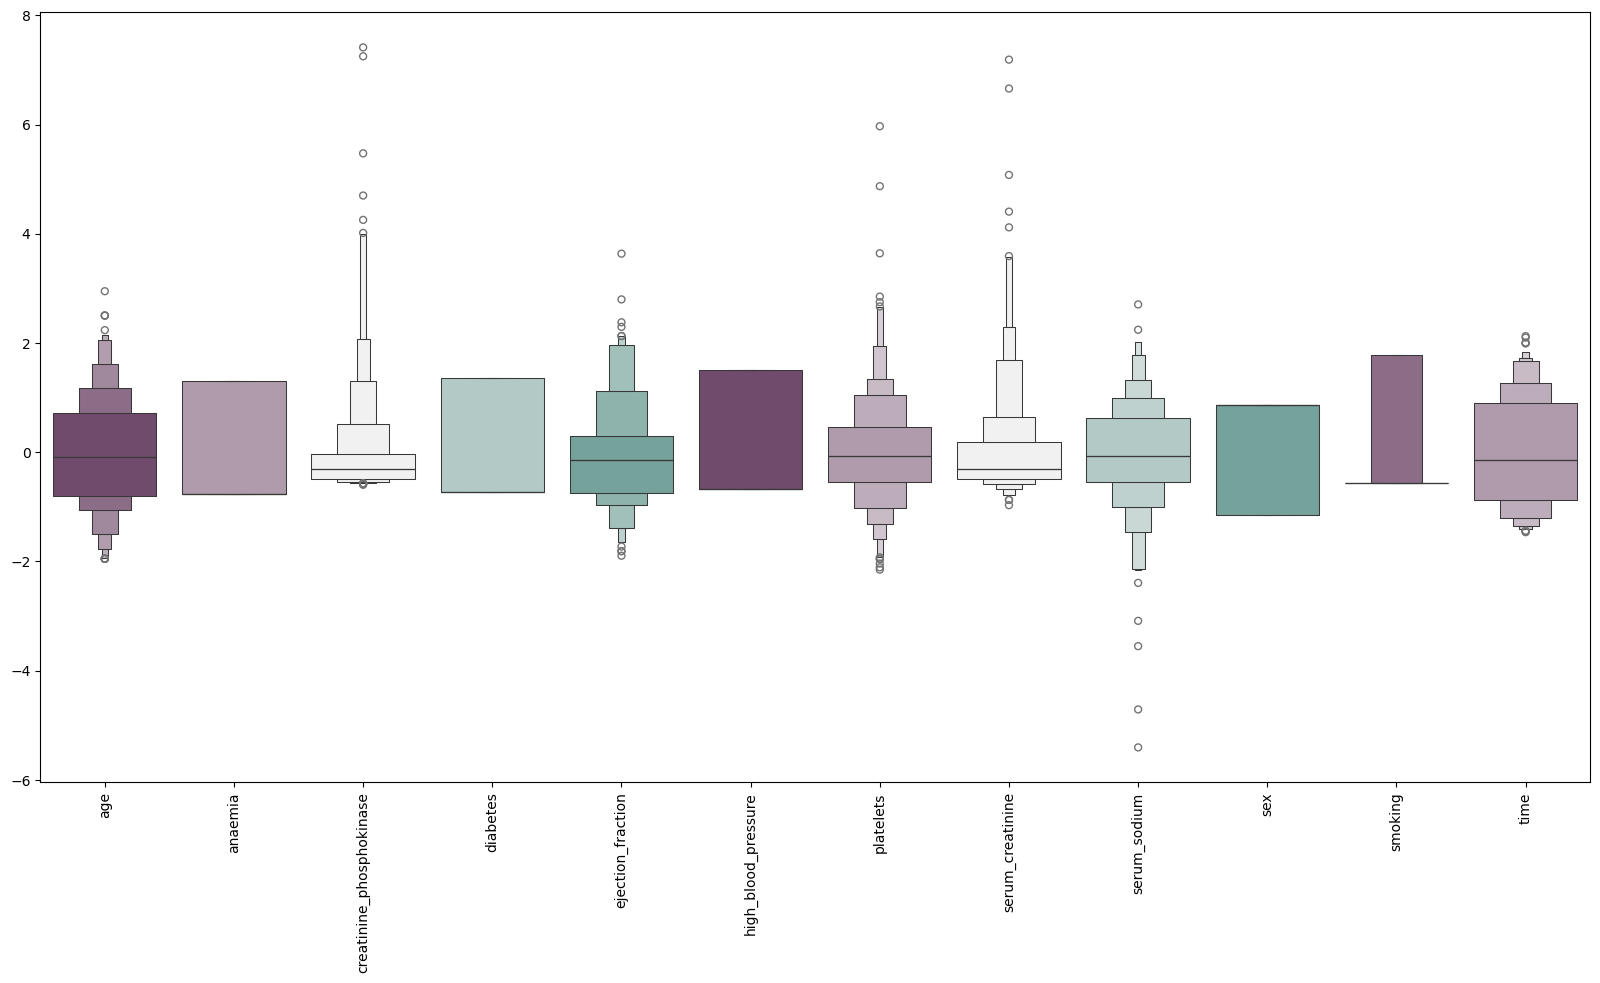

In [22]:
#looking at the scaled features
colours =["#774571","#b398af","#f1f1f1" ,"#afcdc7", "#6daa9f"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = X_train_sc,palette = colours)
plt.xticks(rotation=90)
plt.show()

# **<span style="color:#6daa9f;">MODEL BUILDING</span>**

In this project, we build an artificial neural network.

**Following steps are involved in the model building**
* Initialising the ANN
* Defining by adding layers
* Compiling the ANN
* Train the ANN

In [ ]:

# Initialising the NN
model = Sequential()
# layers
model.add(Dense(units = 32,  activation = 'relu', input_dim = 12))
model.add(Dense(units = 16, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 8, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 1, activation = 'sigmoid'))

c:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True)

In [25]:
# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [26]:
# Train the ANN
history = model.fit(X_train_sc, y_train, batch_size = 32, epochs = 600,callbacks=[early_stopping], validation_split=0.2)

Epoch 1/600
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.5185 - loss: 0.7041 - val_accuracy: 0.6000 - val_loss: 0.6912
Epoch 2/600
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5477 - loss: 0.6937 - val_accuracy: 0.6154 - val_loss: 0.6823
Epoch 3/600
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5430 - loss: 0.6919 - val_accuracy: 0.6923 - val_loss: 0.6731
Epoch 4/600
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5474 - loss: 0.6751 - val_accuracy: 0.6769 - val_loss: 0.6651
Epoch 5/600
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5411 - loss: 0.6860 - val_accuracy: 0.6769 - val_loss: 0.6587
Epoch 6/600
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6375 - loss: 0.6493 - val_accuracy: 0.6769 - val_loss: 0.6514
Epoch 7/600
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5957 - loss: 0.6574 - val_accuracy: 0.7385 - val_loss: 0.6432
Epoch 8/600
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6378 - loss: 0.6543 - val_accuracy: 0.7692 - val_loss: 0.6339

In [27]:
val_accuracy = np.mean(history.history['val_accuracy'])
print("%s: %.2f%%" % ('val_accuracy', val_accuracy*100))
print(f"val_ accuracy :",val_accuracy*100)

val_accuracy: 82.18%
val_ accuracy : 82.17506737544619


**Plotting training and validation loss over epochs**

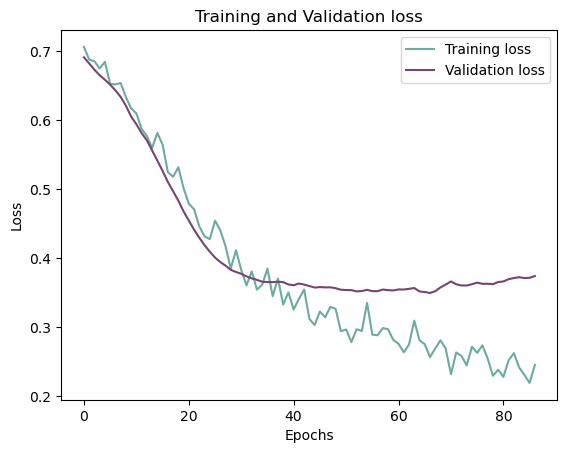

In [28]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#6daa9f", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#774571", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

**Plotting training and validation accuracy over epochs**

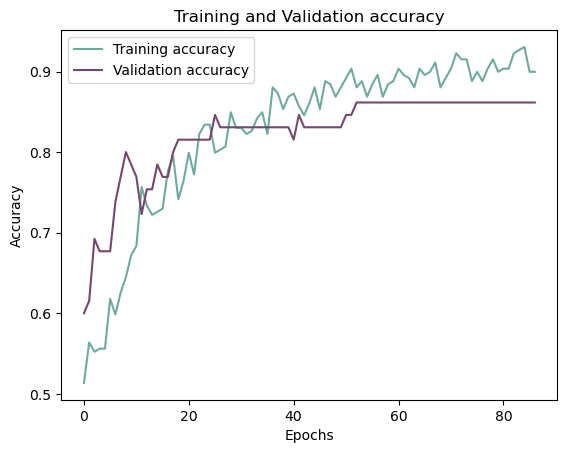

In [29]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#6daa9f", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#774571", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# **<span style="color:#6daa9f;">CONCLUSIONS</span>**

**Concluding the model with:**

* Testing on the test set
* Evaluating the confusion matrix
* Evaluating the classification report

In [ ]:
# Predicting the test set results
y_pred = model.predict(X_test_sc)
# This converts y_pred into a Boolean array (or integer 0 and 1 array).
y_pred = (y_pred > 0.5)
np.set_printoptions()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step 


In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.80      0.85        41
           1       0.82      0.90      0.86        41

    accuracy                           0.85        82
   macro avg       0.86      0.85      0.85        82
weighted avg       0.86      0.85      0.85        82

